<a href="https://colab.research.google.com/github/Mohammed-asaad-AI/Google_Stock_Predicting-/blob/main/GOOGLE_stock_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ---- Importing Libraries ----
First of all we import libraries we will use.


In [1]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle

plt.style.use('ggplot')

# ---- Step 1: Load Data ----
We Load the data which we will deal with
in this case we used google stock prices from kagle : https://www.kaggle.com/datasets/henryshan/google-stock-price/data

In [2]:
df = pd.read_csv('/content/GOOG.csv', parse_dates=['Date'], index_col='Date')
df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# --- Exploratory data analysis ---






In [3]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100
2023-12-05,130.369995,133.539993,129.729996,132.389999,132.389999,19216500


In [5]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [6]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
std,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


# ---- Step 2: Feature Engineering ----
Calculating The HL percentage and Percentage change

In [7]:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100.0
df['PCT_Change'] = (df['Adj Close'] - df['Open']) / df['Open'] * 100.0

df = df[['Adj Close', 'HL_PCT', 'PCT_Change', 'Volume']]

# ---- Step 3: Preparing Labels ----


In [8]:
forecast_col = 'Adj Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.1 * len(df)))  # Forecast 10% of the dataset

df['label'] = df[forecast_col].shift(-forecast_out)


# ---- Step 4: Feature and Label Creation ----


In [9]:

X = np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

# ---- Step 5: Train/Test Split ----


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# ---- Step 6: Train Models ----


In [11]:

# SVM Model
svm_model = svm.SVR(kernel='linear')
svm_model.fit(X_train, y_train)

with open('svm_linear.pickle', 'wb') as f:
    pickle.dump(svm_model, f)

# Linear Regression Model
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)

with open('linearregression.pickle', 'wb') as l:
    pickle.dump(lr_model, l)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

with open('randomforest.pickle', 'wb') as r:
    pickle.dump(rf_model, r)


# ---- Step 7: Load Models and Test Accuracy ----


In [12]:

with open('svm_linear.pickle', 'rb') as f:
    svm_model = pickle.load(f)

with open('linearregression.pickle', 'rb') as l:
    lr_model = pickle.load(l)

with open('randomforest.pickle', 'rb') as r:
    rf_model = pickle.load(r)

svm_accuracy = svm_model.score(X_test, y_test)
lr_accuracy = lr_model.score(X_test, y_test)
rf_accuracy = rf_model.score(X_test, y_test)

print(f"Model Accuracy (SVM): {svm_accuracy:.4f}")
print(f"Model Accuracy (Linear Regression): {lr_accuracy:.4f}")
print(f"Model Accuracy (Random Forest): {rf_accuracy:.4f}")


Model Accuracy (SVM): 0.7917
Model Accuracy (Linear Regression): 0.8006
Model Accuracy (Random Forest): 0.9424


#📉 Results Interpretation
The project compares the performance of three regression models
   

1.   Support Vector Machine (SVM).
2.   Linear Regression.
3.   Random Forest Regression.

in forecasting future stock prices for Google (GOOG).

# 🔍 Key Observations:

*   SVM tends to produce conservative and linear forecasts. It captures the general trend but may underfit during volatile periods.

*   Linear Regression offers a more direct line of best fit and may overestimate long-term growth if the recent trend is upward.


*   Random Forest often performs **better** due to its ability to capture non-linear patterns and interactions in the data. Its forecasts generally adapt more smoothly to recent changes in market behavior.



# ---- Step 8: Forecasting ----


In [13]:

svm_forecast = svm_model.predict(X_lately)
lr_forecast = lr_model.predict(X_lately)
rf_forecast = rf_model.predict(X_lately)


# ---- Step 9: Preparing for Visualization ----


In [14]:

df['Forecast_SVM'] = np.nan
df['Forecast_LR'] = np.nan
df['Forecast_RF'] = np.nan

last_date = df.index[-1]
next_unix = last_date.timestamp() + 86400

for pred_svm, pred_lr, pred_rf in zip(svm_forecast, lr_forecast, rf_forecast):
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-3)] + [pred_svm, pred_lr, pred_rf]


# ---- Step 10: Visualization ----


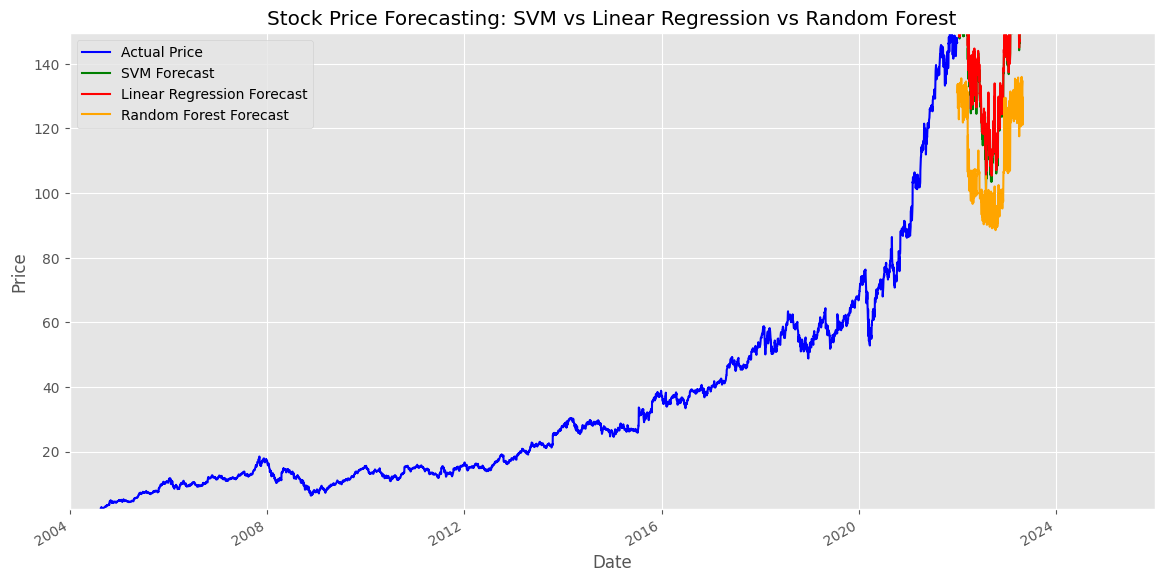

In [15]:
plt.figure(figsize=(14, 7))

df['Adj Close'].plot(label='Actual Price', color='blue')
df['Forecast_SVM'].plot(label='SVM Forecast', color='green')
df['Forecast_LR'].plot(label='Linear Regression Forecast', color='red')
df['Forecast_RF'].plot(label='Random Forest Forecast', color='orange')

plt.xlim([datetime.datetime(2004, 1, 1), datetime.datetime(2025, 12, 31)])
plt.ylim([df['Adj Close'].min() * 0.9, max(df['Forecast_RF'].max(), df['Forecast_RF'].max()) * 1.1])


plt.title('Stock Price Forecasting: SVM vs Linear Regression vs Random Forest')


plt.xlabel('Date')
plt.ylabel('Price')


plt.legend()
plt.grid(True)

plt.show()

#📈 Forecast Visuals:
The chart clearly separates the historical prices (in blue) from the forecasted prices:

🟢 Green: SVM

🔴 Red: Linear Regression

🟠 Orange: Random Forest

Random Forest predictions show a **smoother curve**, adapting well to data fluctuations, whereas Linear Regression extends a linear trend beyond the last known data point. SVM forecasts are more stable but may not capture sharp turning points in price.



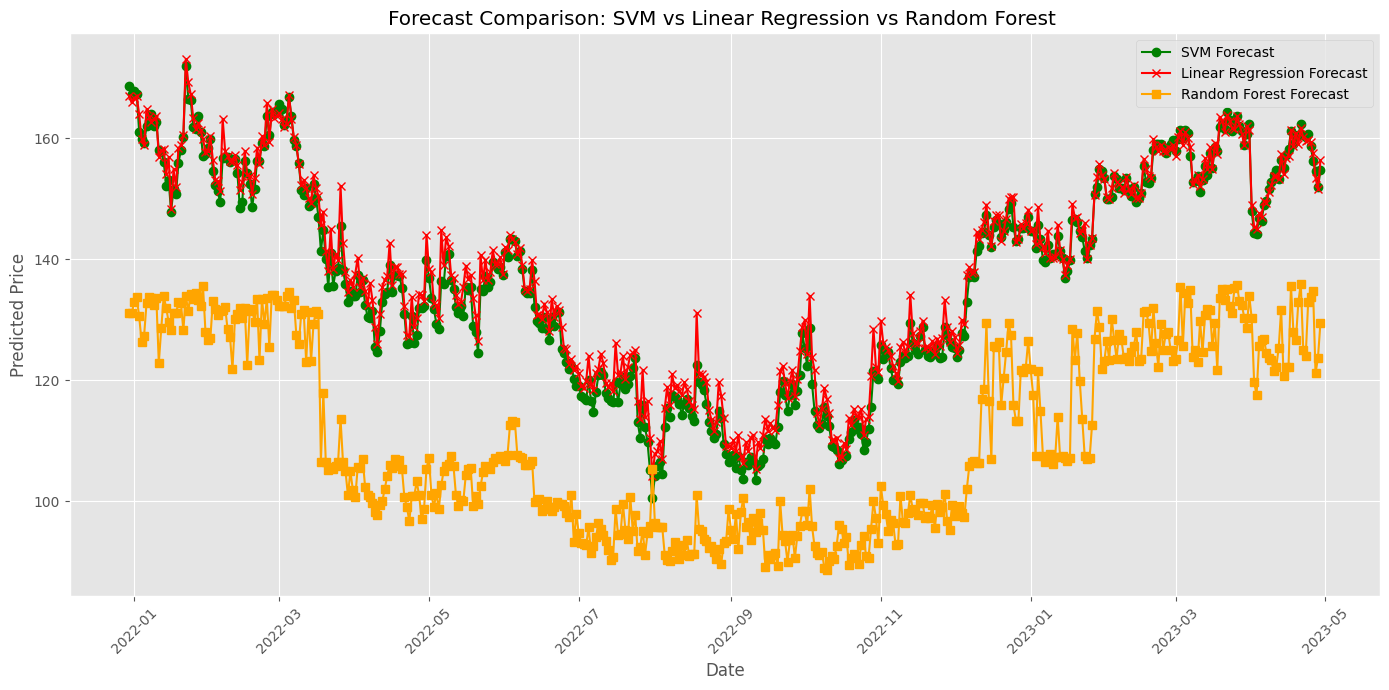

In [16]:
forecast_dates = df.index[df['Forecast_SVM'].notna() | df['Forecast_LR'].notna()| df['Forecast_RF'].notna()]

plt.figure(figsize=(14, 7))

plt.plot(forecast_dates, df.loc[forecast_dates, 'Forecast_SVM'], label='SVM Forecast', color='green', marker='o')
plt.plot(forecast_dates, df.loc[forecast_dates, 'Forecast_LR'], label='Linear Regression Forecast', color='red', marker='x')
plt.plot(forecast_dates, df.loc[forecast_dates, 'Forecast_RF'], label='Random Forest Forecast', color='orange', marker='s')

plt.title('Forecast Comparison: SVM vs Linear Regression vs Random Forest ')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

